# Bike Sharing Data Analysis

Fanaee-T, H. (2013). Bike Sharing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5W894.

In [48]:
# Import dataset and libraries

from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 

Take a look at the data structure

In [7]:
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [10]:
X.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700


In [8]:
y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


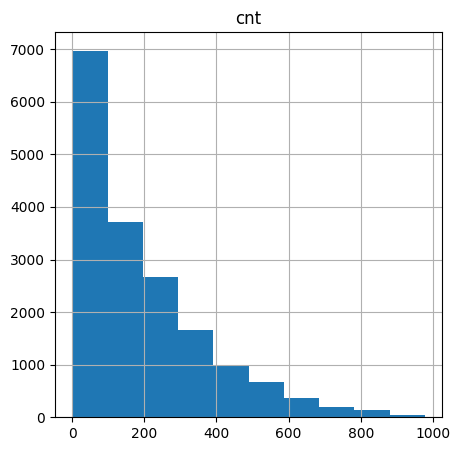

In [46]:
y.hist(figsize=(5,5))
plt.show()

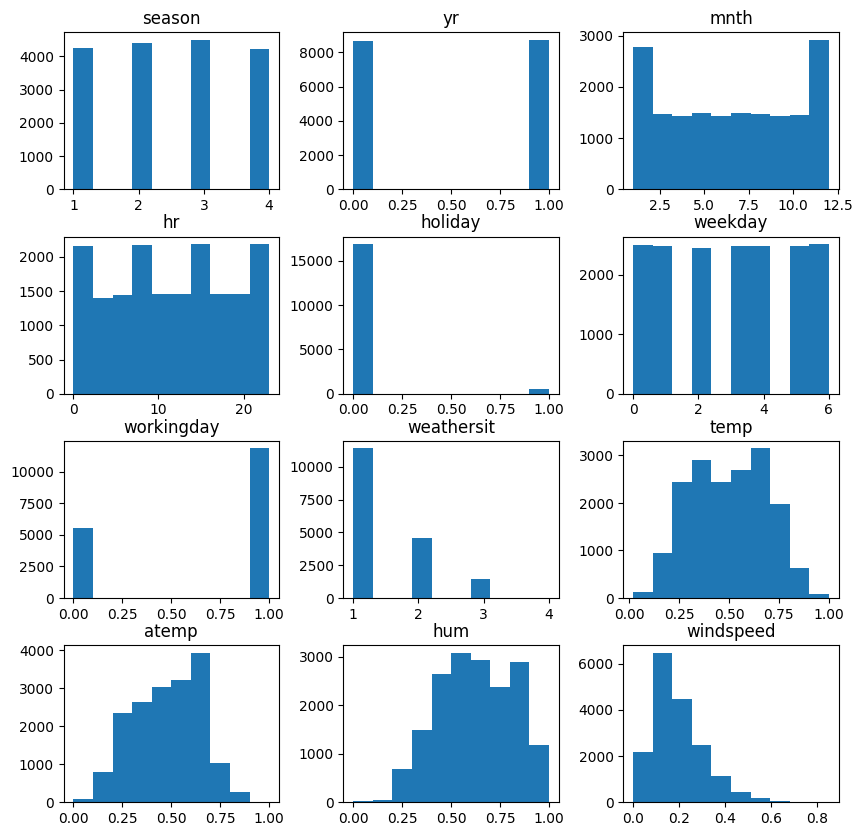

In [52]:
X.hist(figsize=(10,10), grid=False)
plt.show()


In [26]:
combined_df = pd.concat([X, y], axis=1)
corr_mat = combined_df.corr(numeric_only=True)
corr_mat["cnt"].sort_values(ascending=False)

cnt           1.000000
temp          0.404772
atemp         0.400929
hr            0.394071
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

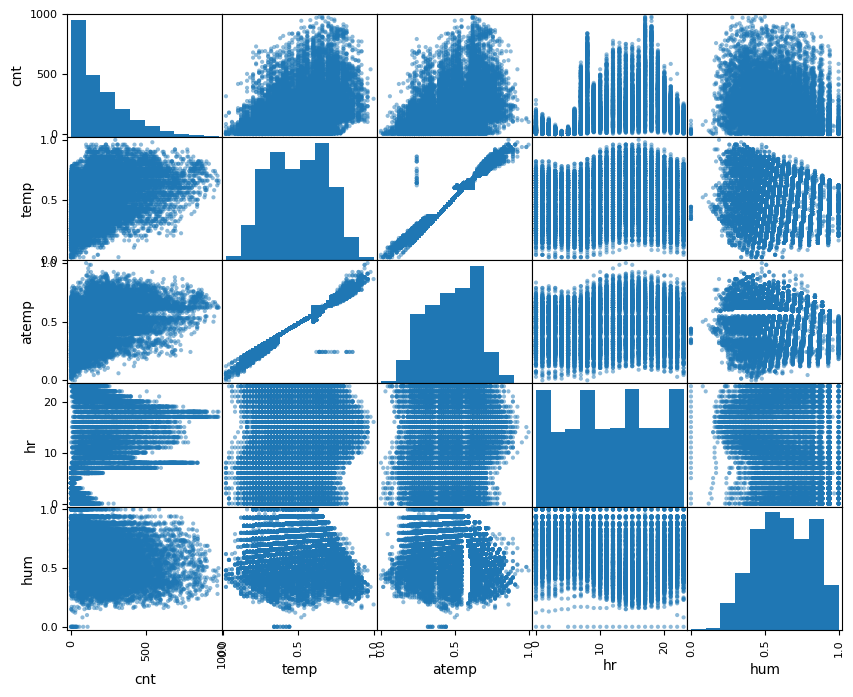

In [ ]:
attributes = ["cnt", "temp", "atemp", "hr", "hum"]
scatter_matrix(combined_df[attributes], figsize=(10,8))
plt.show()

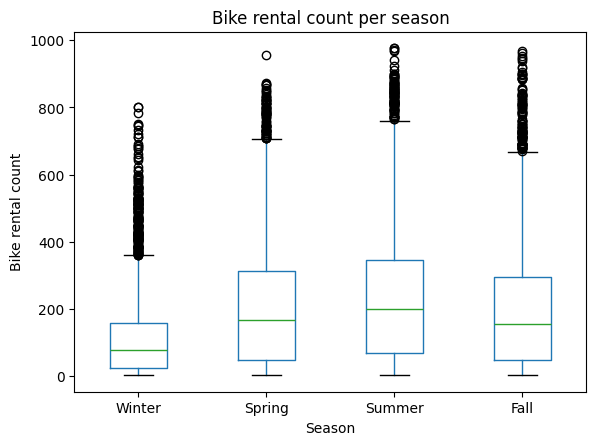

In [86]:
combined_df.boxplot(column="cnt", by="season", grid=False)
plt.title("Bike rental count per season")
plt.suptitle('')
plt.xlabel("Season")
plt.xticks(np.arange((combined_df["season"].nunique()))+1,
           labels=["Winter", "Spring", "Summer", "Fall"])
plt.ylabel("Bike rental count")
plt.show()

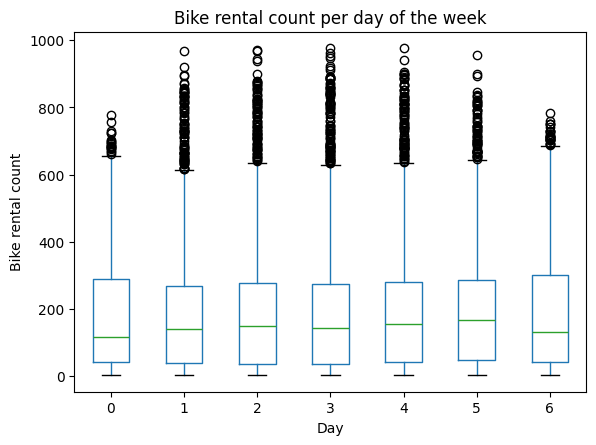

In [88]:
combined_df.boxplot(column="cnt", by="weekday", grid=False)
plt.title("Bike rental count per day of the week")
plt.suptitle('')
plt.xlabel("Day")
plt.ylabel("Bike rental count")
plt.show()

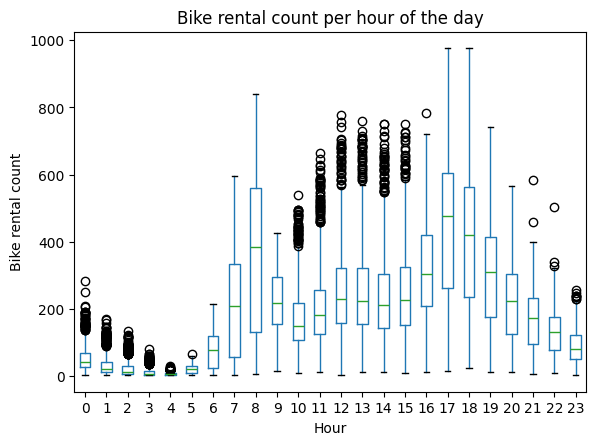

In [95]:
combined_df.boxplot(column='cnt', by='hr', grid=False)
plt.title("Bike rental count per hour of the day")
plt.suptitle('')
plt.xlabel("Hour")
plt.ylabel("Bike rental count")
plt.show()

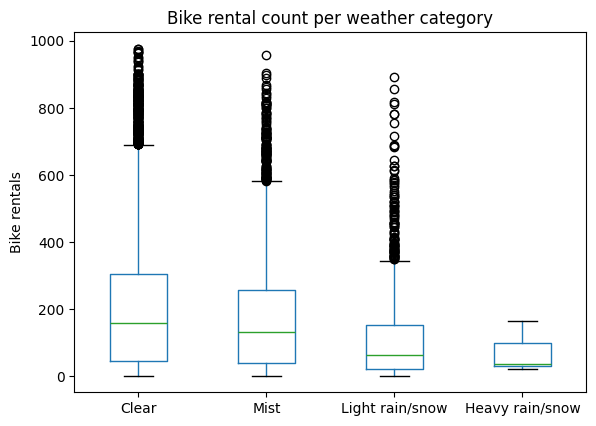

In [103]:
combined_df.boxplot(column="cnt", by="weathersit", grid=False)
plt.title("Bike rental count per weather category")
plt.suptitle('')
plt.xlabel("")
plt.xticks(np.arange((combined_df["weathersit"].nunique()))+1,
           labels=["Clear", "Mist", "Light rain/snow", "Heavy rain/snow"])
plt.ylabel("Bike rentals")
plt.show()

Temporal Analysis:

Convert dteday to a datetime object.

Plot the total cnt over the entire two-year period to observe overall trends and seasonality.

Create a line plot showing the average number of rentals by hour, separating weekdays from weekends. This will highlight different usage patterns (commuter vs. leisure).

1.6. Multivariate Analysis:

Compute a correlation matrix for all numerical features (temp, atemp, hum, windspeed, casual, registered, cnt).

Visualize this matrix using a seaborn.heatmap. Check for multicollinearity (e.g., temp and atemp will be highly correlated).

Phase 2: Data Preprocessing and Feature Engineering
2.1. Data Cleaning:

Handle any missing values (if any were found in EDA).

Address outliers identified in the box plots (e.g., using capping or removal, if justified).

2.2. Feature Engineering:

Drop Redundant Columns: dteday can be dropped after extracting time features. atemp can be dropped due to its high correlation with temp. casual and registered must be dropped as they add up to the target cnt and would cause data leakage. instant is just an index and can be dropped.

Categorical Variable Encoding: The categorical variables (season, weathersit, etc.) are already numerically encoded. Verify if the encoding is appropriate (ordinal vs. nominal). For models that don't interpret numerical order (like Linear Regression), one-hot encoding might be necessary.

Create New Features (Optional):

Create a day_period feature (e.g., morning, afternoon, evening, night) from the hr column.

Create a feature that combines weather and season to capture conditions like "cold rainy day."